In [12]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import requests
import cv2
from skimage import io

# Leukemia pipeline classification
This notebook presents multiple samples using Arkangel AI's implementation of a lymphocite detector for leukemia screening through thin blood smears examination 

In [13]:
samples = [{
    "im":"sample_images/Im012_1.jpg",
    "url":"https://storage.googleapis.com/sample-leukemia/Im012_1.jpg",
},
{
    "im":"sample_images/Im024_1.jpg",
    "url":"https://storage.googleapis.com/sample-leukemia/Im024_1.jpg",
},
{
    "im":"sample_images/Im032_1.jpg",
    "url":"https://storage.googleapis.com/sample-leukemia/Im032_1.jpg",
},
{
    "im":"sample_images/Im093_0.jpg",
    "url":"https://storage.googleapis.com/sample-leukemia/Im093_0.jpg",
},
{
    "im":"sample_images/Im005_1.jpg",
    "url":"https://storage.googleapis.com/sample-leukemia/Im005_1.jpg",
}]

In [22]:
def open_image(image_path):
    im = io.imread(image_path)
    #print(im)
    return im
    #cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

## 1. Sample images
The following are sample images

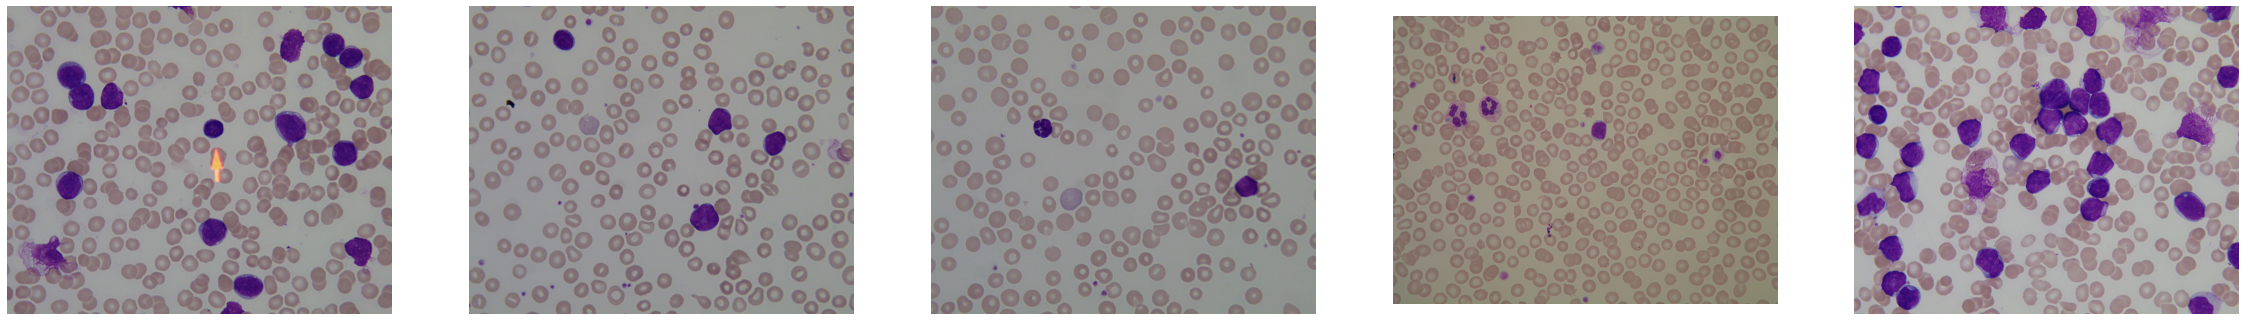

In [23]:
fig,axs=plt.subplots(1,5,figsize=(40,15))
for i,s in enumerate(samples):
    im = open_image(s["url"])
    axs[i].imshow(im)
    axs[i].axis("off")

change this variable with values from 1 to 5 to select one of the images above.

In [5]:
sample_select = 1

## Prediction using our API
the following cells will run a prediction by using the requests library. Additionally an image with overlayed results is displayed for visualization with the following color codes: Yellow - WBC, Red - Leukoblasto

In [24]:
API_url = "http://3.144.134.56:8080/leukemia_predict"
print({"image":samples[sample_select-1]["url"]})
req = requests.post(API_url, json={"image":samples[sample_select-1]["url"]})
results = req.json()
print(results)

{'image': 'https://storage.googleapis.com/sample-leukemia/Im012_1.jpg'}
{'boxes': [[404, 329, 530, 455], [258, 337, 394, 454], [1391, 109, 1514, 231], [204, 723, 349, 866], [858, 494, 974, 597], [1178, 456, 1345, 617], [1435, 588, 1566, 716], [838, 937, 985, 1072], [1491, 1019, 1643, 1167], [213, 235, 361, 373], [1467, 174, 1595, 287], [1516, 302, 1639, 419], [998, 1180, 1145, 1313]], 'scores': [0.9441128969192505, 0.9193190336227417, 0.944105863571167, 0.9223362803459167, 0.9405260682106018, 0.9470037817955017, 0.9234830737113953, 0.9545420408248901, 0.6771045327186584, 0.9562371373176575, 0.9492844343185425, 0.8936575055122375, 0.9567916393280029], 'classification': [True, True, True, True, False, True, True, True, True, True, True, True, True]}


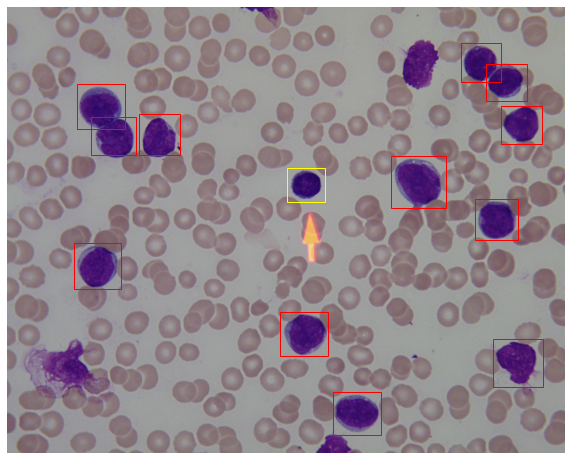

In [26]:
boxes_nm = results["boxes"]
pred_classes = results["classification"]

fig, axs = plt.subplots(1, figsize=(10,10))
axs.imshow(open_image(samples[sample_select-1]["url"]))
    
for box, cla in zip(boxes_nm, pred_classes):
    if cla:
        color="Red"
    else:
        color="Yellow"
    rect = Rectangle((box[0], box[3]),  box[2]-box[0], -(box[3]-box[1]), fill=None, color=color)
    axs.add_patch(rect)
    axs.axis("off")